# Batch analysis across mice & regions

In [1]:
%load_ext autoreload
%load_ext skip_kernel_extension
%autoreload 2

## Imports

In [2]:
import logging
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from constants import *
from utils import *
from logger import logger
from fileops import get_stats_dir, get_figs_dir, load_stats_dataset, save_figs_book
from postpro import *
from plotters import *

logger.setLevel(logging.INFO)
figs = {}

### Load data

In [3]:
sdir = get_stats_dir()
fpaths = [os.path.join(sdir, item) for item in os.listdir(sdir)]
Fstats = pd.concat([load_stats_dataset(fpath) for fpath in fpaths], axis=0)
logger.info('stats dataset:')
Fstats

 05/01/2022 16:13:30: loading data from mouse1_region2.csv
 05/01/2022 16:13:30: loading data from mouse1_region1.csv
 05/01/2022 16:13:30: loading data from mouse7_region2.csv
 05/01/2022 16:13:30: loading data from mouse7_region1.csv
 05/01/2022 16:13:31: loading data from mouse12_region1.csv
 05/01/2022 16:13:31: loading data from mouse10_region1.csv
 05/01/2022 16:13:31: loading data from mouse9_region2.csv
 05/01/2022 16:13:31: loading data from mouse9_region1.csv
 05/01/2022 16:13:31: loading data from mouse6_region1.csv
 05/01/2022 16:13:31: loading data from mouse6_region2.csv
 05/01/2022 16:13:32: stats dataset:


line  trial_length  duration (s)   fps  \
mouse_reg      ROI  run trial                                            
mouse1_region2 106  0   1      line3           100           0.2  3.56   
                        2      line3           100           0.2  3.56   
                        3      line3           100           0.2  3.56   
                        4      line3           100           0.2  3.56   
                        5      line3           100           0.2  3.56   
...                              ...           ...           ...   ...   
mouse6_region2 1286 14  9      line3           100           0.2  3.56   
                        11     line3           100           0.2  3.56   
                        12     line3           100           0.2  3.56   
                        13     line3           100           0.2  3.56   
                        15     line3           100           0.2  3.56   

                               P (MPa)  DC (%)  run ID  valid  \
mouse_reg      ROI  run trial                                   
mouse1_region2 106  0   1          0.0    50.0     742   True   
                        2          0.0    50.0     742   True   
                        3          0.0    50.0     742   True   
                        4          0.0    50.0     742   True   
                        5          0.0    50.0     742   True   
...                                ...     ...     ...    ...   
mouse6_region2 1286 14  9          0.8    80.0     766   True   
                        11         0.8    80.0     766   True   
                        12         0.8    80.0     766   True   
                        13         0.8    80.0     766   True   
                        15         0.8    80.0     766   True   

                               peak displacement velocity (um/s)  motion  \
mouse_reg      ROI  run trial                                              
mouse1_region2 106  0   1                               0.507439   False   
                        2                               0.285719   False   
                        3                               0.377515   False   
                        4                               0.486793   False   
                        5                               0.377771   False   
...                                                          ...     ...   
mouse6_region2 1286 14  9                               0.336987   False   
                        11                              0.678482   False   
                        12                              0.119659   False   
                        13                              0.716342   False   
                        15                              0.205309   False   

                               max pre-stim Z(ΔF/F0)  pre-stim activity?  \
mouse_reg      ROI  run trial                                              
mouse1_region2 106  0   1                   0.197133               False   
                        2                  -0.712225               False   
                        3                  -0.330424               False   
                        4                   0.390796               False   
                        5                   1.388284               False   
...                                              ...                 ...   
mouse6_region2 1286 14  9                  -0.190486               False   
                        11                  1.335852               False   
                        12                 -0.809899               False   
                        13                  1.321706               False   
                        15                  0.305365               False   

                               peak post-stim [Z(ΔF/F0) - Z(ΔF/F0)_stim]  \
mouse_reg      ROI  run trial                                              
mouse1_region2 106  0   1                                       3.065964   
                 

### Cell type breakdown

 05/01/2022 16:13:32: discarding samples with significant motion artefact...
 05/01/2022 16:13:32: discarding samples with pre-stimulus activity...
 05/01/2022 16:13:33: discarding invalid samples...


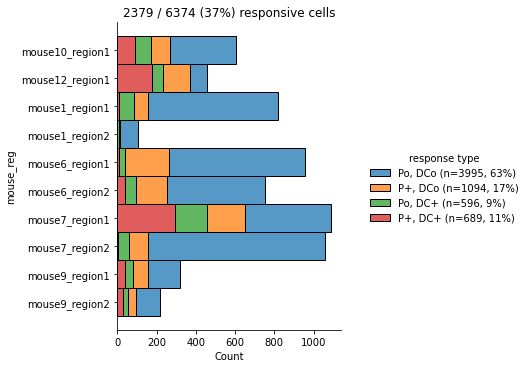

In [4]:
figs['rtype_dist_per_mousereg'] = plot_cellcounts_by_type(
    included(Fstats), hue=Label.ROI_RESP_TYPE)

### Z-score dependency traces per mouse-region

In [5]:
ykey = Label.PEAK_REL_ZSCORE_POSTSTIM
qbounds_vec = [(0, 1), (.25, .5), (.5, .75), (.75, 1.)]
ybounds = (0, 9)

#### Pressure dependency

 05/01/2022 16:13:34: discarding samples with significant motion artefact...
 05/01/2022 16:13:34: discarding samples with pre-stimulus activity...
 05/01/2022 16:13:35: discarding invalid samples...
 05/01/2022 16:13:35: selecting 0 - 1 quantile slice from peak post-stim [Z(ΔF/F0) - Z(ΔF/F0)_stim] for each mouse_reg & response type & run...
 05/01/2022 16:13:41: selected 1254918 / 1258192 samples (99.7% of dataset)
 05/01/2022 16:13:41: sub-indexing data...
 05/01/2022 16:13:41: filtering data...
 05/01/2022 16:13:41: cross-checking filters...
 05/01/2022 16:13:41: grouping by response type, grouping by mouse_reg, averaging and plotting mean peak post-stim [Z(ΔF/F0) - Z(ΔF/F0)_stim] vs. P (MPa) ...
 05/01/2022 16:13:47: discarding samples with significant motion artefact...
 05/01/2022 16:13:47: discarding samples with pre-stimulus activity...
 05/01/2022 16:13:48: discarding invalid samples...
 05/01/2022 16:13:48: selecting 0.25 - 0.5 quantile slice from peak post-stim [Z(ΔF/F0) - Z

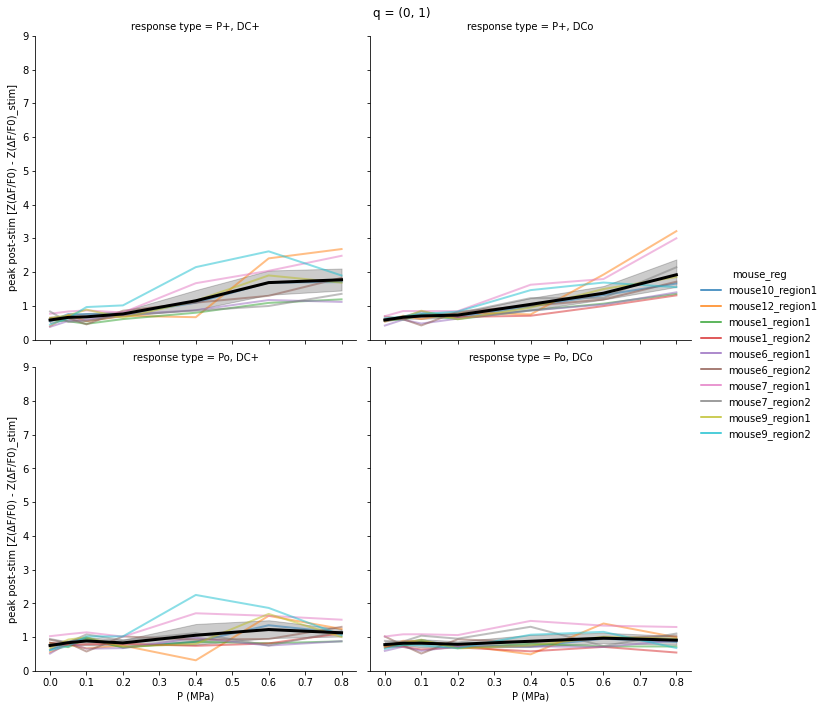

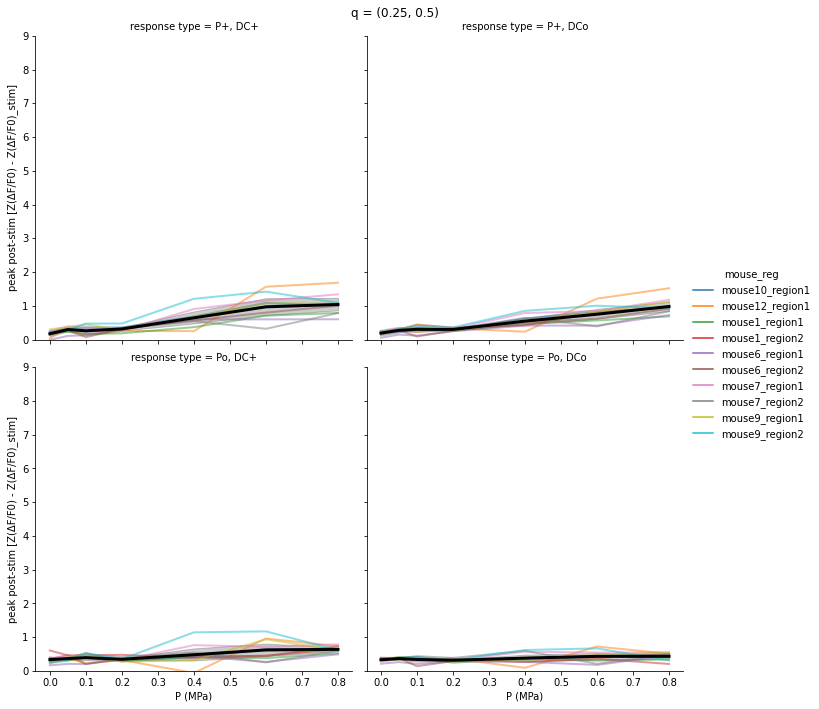

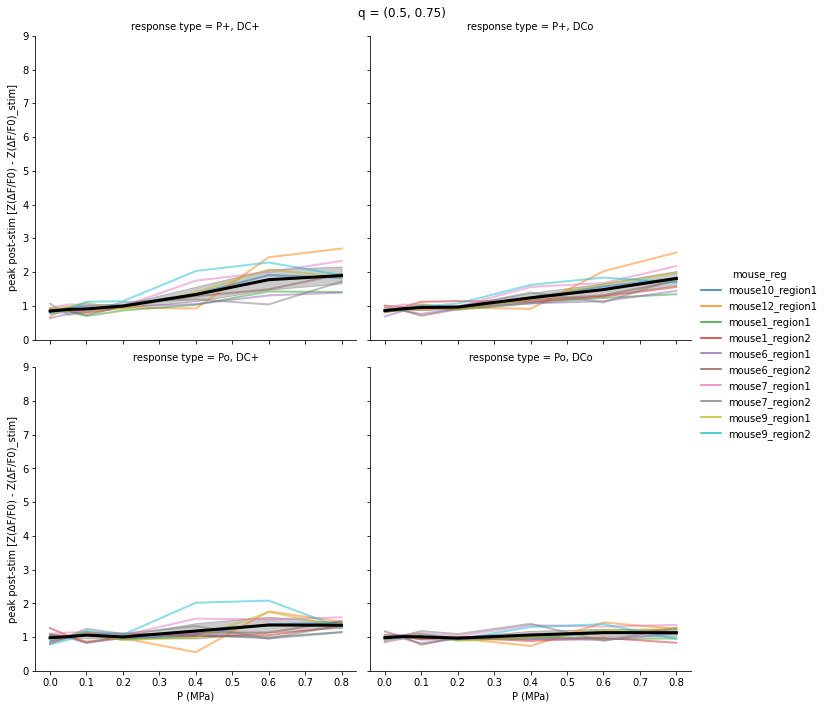

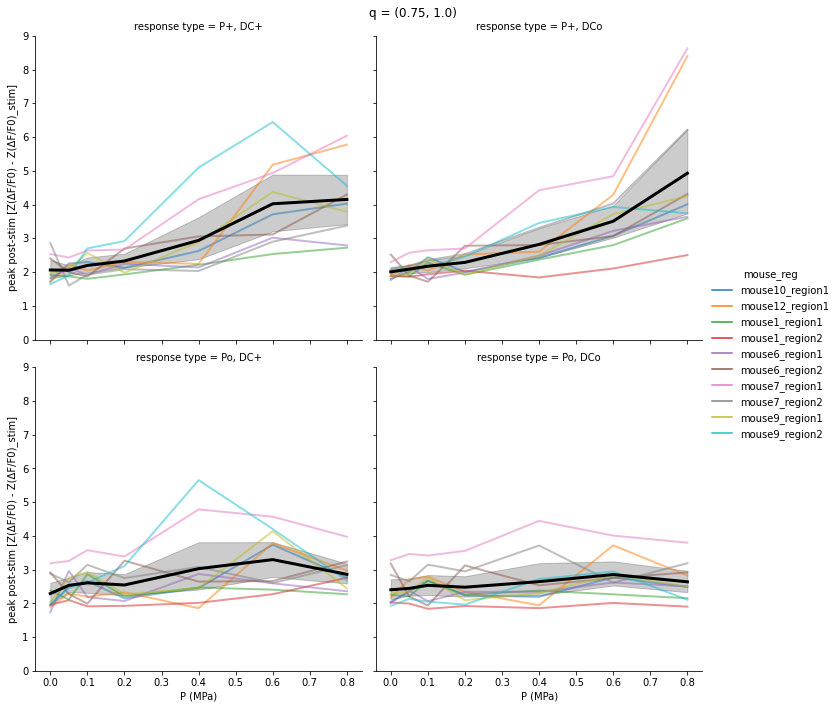

In [6]:
xkey = Label.P
for qbounds in qbounds_vec:
    figs[f'{xkey}_{qbounds}'] = plot_parameter_dependency_across_datasets(
        Fstats, xkey, ykey, qbounds, ybounds=ybounds)

#### Duty cycle dependency

 05/01/2022 16:14:04: discarding samples with significant motion artefact...
 05/01/2022 16:14:05: discarding samples with pre-stimulus activity...
 05/01/2022 16:14:05: discarding invalid samples...
 05/01/2022 16:14:05: selecting 0 - 1 quantile slice from peak post-stim [Z(ΔF/F0) - Z(ΔF/F0)_stim] for each mouse_reg & response type & run...
 05/01/2022 16:14:10: selected 1254918 / 1258192 samples (99.7% of dataset)
 05/01/2022 16:14:10: sub-indexing data...
 05/01/2022 16:14:10: filtering data...
 05/01/2022 16:14:11: cross-checking filters...
 05/01/2022 16:14:11: grouping by response type, grouping by mouse_reg, averaging and plotting mean peak post-stim [Z(ΔF/F0) - Z(ΔF/F0)_stim] vs. DC (%) ...
 05/01/2022 16:14:19: discarding samples with significant motion artefact...
 05/01/2022 16:14:19: discarding samples with pre-stimulus activity...
 05/01/2022 16:14:19: discarding invalid samples...
 05/01/2022 16:14:19: selecting 0.25 - 0.5 quantile slice from peak post-stim [Z(ΔF/F0) - Z(

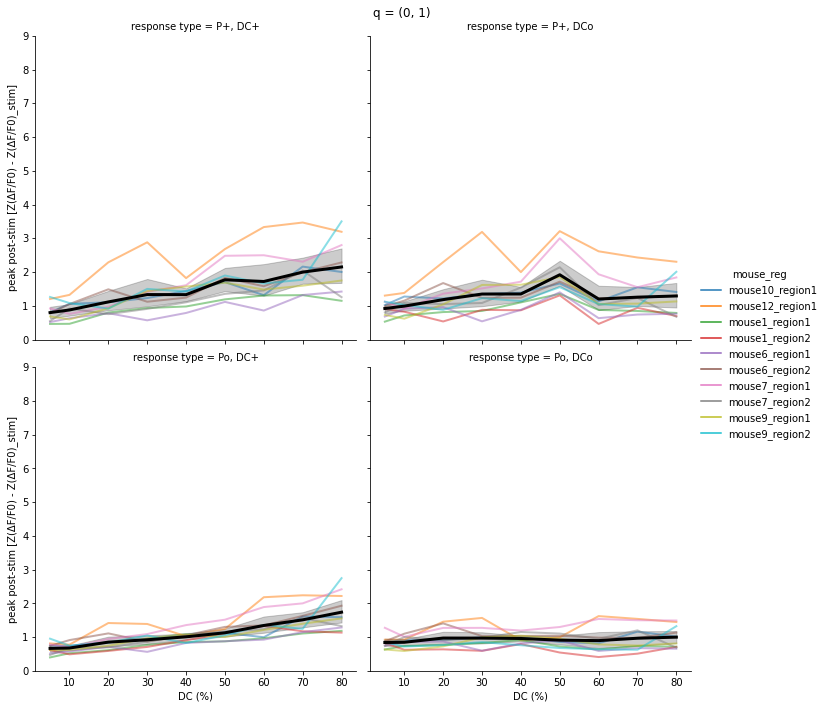

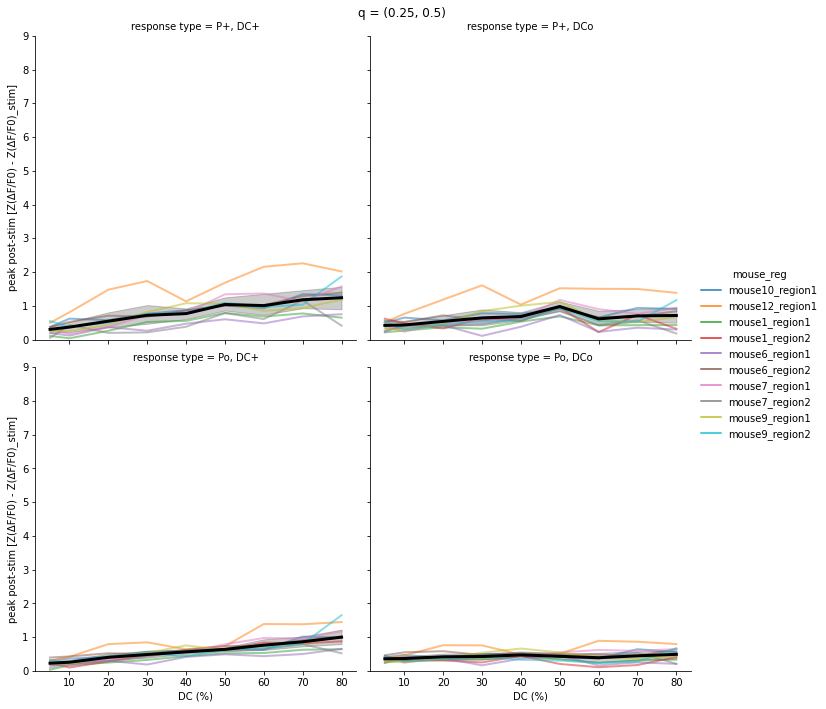

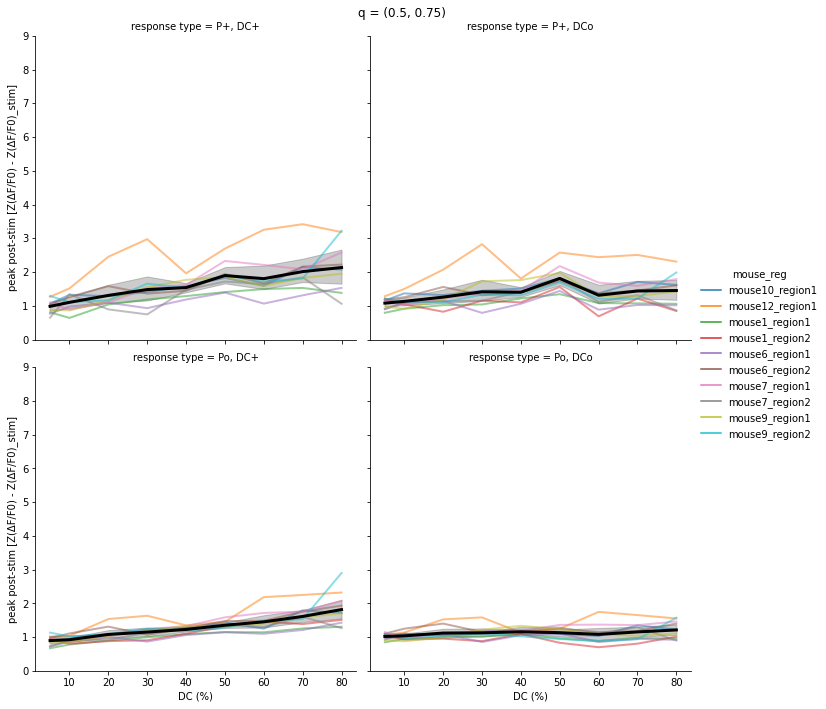

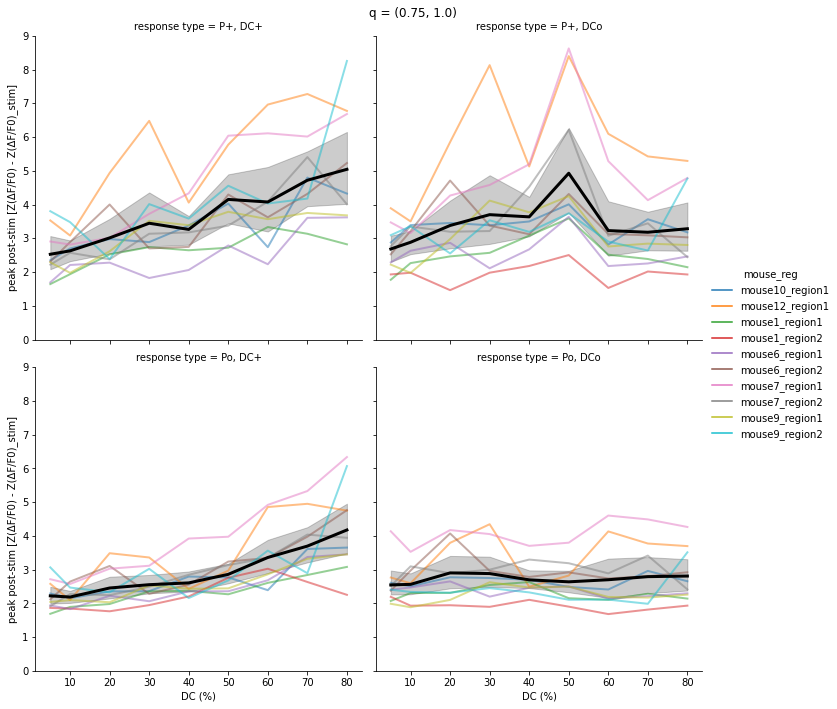

In [7]:
xkey = Label.DC
for qbounds in qbounds_vec:
    figs[f'{xkey}_{qbounds}'] = plot_parameter_dependency_across_datasets(
        Fstats, xkey, ykey, qbounds, ybounds=ybounds)

### Save figures

In [8]:
figsdir = get_figs_dir()  # Directory for output figures
figs = {k: v for k, v in figs.items() if v is not None}
save_figs_book(figsdir, figs, prefix='global')

 05/01/2022 16:14:36: saving figure "rtype_dist_per_mousereg" on page 0
 05/01/2022 16:14:37: saving figure "P (MPa)_(0, 1)" on page 1
 05/01/2022 16:14:37: saving figure "P (MPa)_(0.25, 0.5)" on page 2
 05/01/2022 16:14:37: saving figure "P (MPa)_(0.5, 0.75)" on page 3
 05/01/2022 16:14:37: saving figure "P (MPa)_(0.75, 1.0)" on page 4
 05/01/2022 16:14:37: saving figure "DC (%)_(0, 1)" on page 5
 05/01/2022 16:14:37: saving figure "DC (%)_(0.25, 0.5)" on page 6
 05/01/2022 16:14:38: saving figure "DC (%)_(0.5, 0.75)" on page 7
 05/01/2022 16:14:38: saving figure "DC (%)_(0.75, 1.0)" on page 8
